## Code for homework #1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Helper functions for plotting and drawing lines

In [2]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

In [3]:
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

Read and plot data

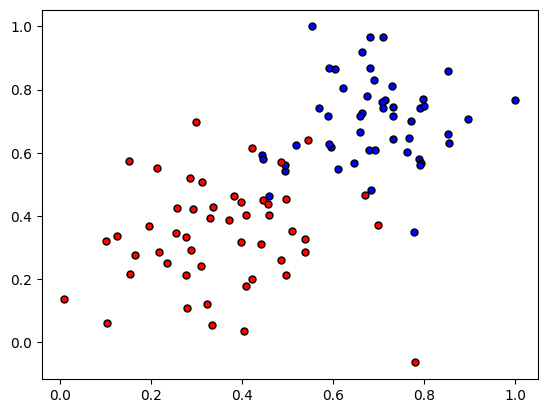

In [4]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [5]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [6]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [7]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

**TODO**: Fill in the code below to implement the perceptron trick.<br> <br>
The function should receive as inputs the data X, the labels y, the weights W (as an array), and the bias b.<br>
Update the weights W and bias b, according to the perceptron algorithm, and return W and b.

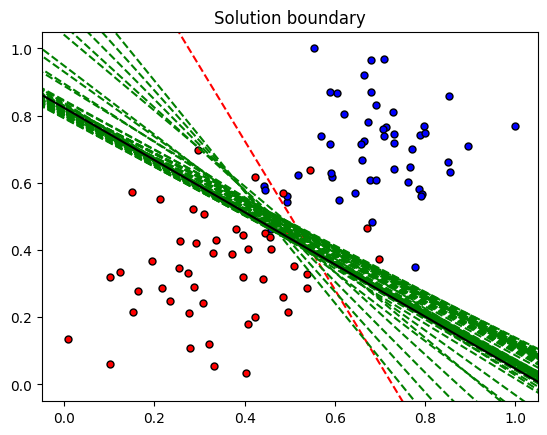

[(array([-2.21467925]), array([1.6113607])),
 (array([-1.65279806]), array([1.23468764])),
 (array([-1.49603588]), array([1.17406518])),
 (array([-1.35394711]), array([1.11911717])),
 (array([-1.22456364]), array([1.0690825])),
 (array([-1.12619364]), array([1.04020947])),
 (array([-1.02309211]), array([0.94816935])),
 (array([-0.96111901]), array([0.93009532])),
 (array([-0.86747817]), array([0.89527227])),
 (array([-0.82769909]), array([0.88837494])),
 (array([-0.82027778]), array([0.83761502])),
 (array([-0.79918903]), array([0.83327749])),
 (array([-0.77831758]), array([0.82898465])),
 (array([-0.72809353]), array([0.81513567])),
 (array([-0.67952]), array([0.8017418])),
 (array([-0.6715073]), array([0.81154158])),
 (array([-0.6890514]), array([0.82708414])),
 (array([-0.71923545]), array([0.79365662])),
 (array([-0.72986506]), array([0.80069555])),
 (array([-0.7406849]), array([0.80786044])),
 (array([-0.75170013]), array([0.81515473])),
 (array([-0.76291609]), array([0.82258193])

In [8]:
def perceptronStep(X, y, W, b, learn_rate):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        next_y_hat = y[i] - y_hat
        if next_y_hat != 0:
            x0 = X[i][0] * learn_rate
            x1 = X[i][1] * learn_rate
            if next_y_hat > 0:
                W[0] += x0
                W[1] += x1
            else:
                W[0] -= x0
                W[1] -= x1
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 65):
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0]
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        if i==0:
            display(-W[0]/W[1], -b/W[1], 'r--')
        else:
            display(-W[0]/W[1], -b/W[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-W[0]/W[1], -b/W[1], 'black')

    # Plotting the data
    plot_points(X, y)
    plt.show()
    return boundary_lines

trainPerceptronAlgorithm(X, y)